# Basic Charts: movies database
by Giancarlo Ruffo, Università degli Studi di Torino

The so called 'IMDB movie database' provides information about movies: release year, average user rating, length, MPAA rating, and so on. For a whole description of the dataset and its fields, see [General Information about the IMDB Movie dataset](http://www.stat.cmu.edu/~rnugent/PCMI2016/IMDBMovies.pdf) 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# uncomment below if you use it from your google colab folder
'''
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%cd /gdrive
'''

"\nfrom google.colab import drive\ndrive.mount('/gdrive', force_remount=True)\n%cd /gdrive\n"

In [3]:
# path should be changed accordingly your local file system or your drive path (if you are using colab)

path = '/Users/ruffo/Documents/Didattica/2019:20/avrc/dataviz/samples/data/movies.csv'
dataset = pd.read_csv(path, index_col=0)

In [4]:
dataset.head()

,title,year,length,budget,rating,votes,r1,r2,r3,r4,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,24.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,14.5,...,0.0,24.5,NaN,0,0,0,0,0,0,0


## Some observation on fields

We have many fields in this dataset. In this notebook we will use only the following:
- __`title`__: title of the movie
- __`rating`__: average IMDB user rating
- __`mpaa`__: Motion Picture Association of America rating: G, PG, PG-13, R, NC-17

## Plotting histograms

A Histogram visualises the distribution of data over a continuous interval or certain time period. The good think about `matplotlib` is that you do not need to calculate frequency of data at each interval/bin, because they are calculated automatically.

These plots are used to estimate how values are distributed and where you can find higher concentration of data, and they exploit our ability to perceive accurately a pre-attentive attribute such as length. The viewer can estimate quite precisely the length of bars, and make very good comparisons between groups of data. It is possibile also to locate quite easily where are outliers, gaps, maximum and minimun. They are also useful for giving a rough view of the probability distribution.

We use a histogram to give a look at the `ratings` ditribution: we need to pass to `hist` function only the interested column: `dataset['rating']`. The values in our dataframe have been imported as strings. Hence, we convert these values' format to `float` before calling our `hist` function. 

Observe that assigning a total number of bins is equivalent to define a discretization granularity. Let's start using only 9 intervals (ratings are in the range 1 to 10)

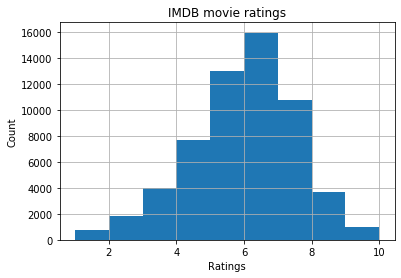

In [5]:
dataset['rating'] = dataset['rating'].astype(float)
plt.hist(dataset['rating'], bins=9)

plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('IMDB movie ratings')
plt.grid(True)
plt.show()

If we want to plot a fine-grained picture of our ratings distribution, we want to add more bins to our plot. Hence, if want to compare the attitude of users to assign full stars only ratings or also adopt half star votes, we can double the number of bins. 

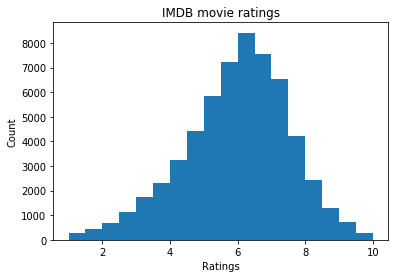

In [6]:
plt.hist(dataset['rating'],bins=18)

plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('IMDB movie ratings')
plt.show()

The exercise can be repeated ad differnt level of granularity, of course.

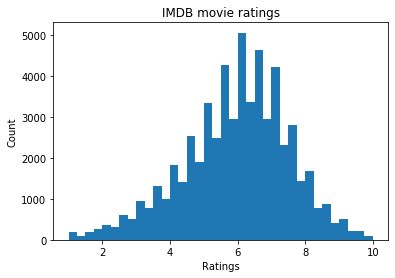

In [7]:
plt.hist(dataset['rating'],bins=36)

plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('IMDB movie ratings')
plt.show()

Despite that the general trend is mantained, you can easily see that decreasing the size of each interval do not necessarily lead our data to follow a perfect curve as you find in basic statistics textbooks. The sample is not as accurate as an infinite set of number, and successive discretizations make our sample resolution somehow _imperfect_. Can you provide an explanation of why this happens? 

Moreover, have you observed that the y-axis scale changed a lot from the first histogram to the third? This is due to the total number of points represented in each interval that decreases when we reduce the size of each bin. In fact, it could be more accurate in some cases to get rid of absolute values and use frequency instead. Within matplotlib, this can be done using the `density` parameter.

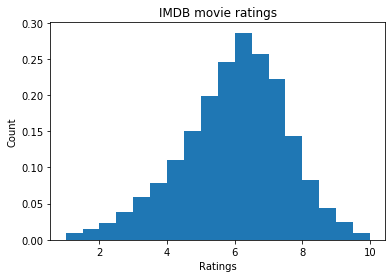

In [8]:
plt.hist(dataset['rating'],bins=18, density=True)

plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('IMDB movie ratings')
plt.show()

After all these examples, probably you got the main difference between using `matplotlib` functions `bar` and `hist`. In the first case, we create a _bar chart_ where we have an already discretized variable to be used in the `x` axis. It fits perfectly when we have some numeric values to be plotted for a few bunch of years, months, or semesters. With the second function, we deal with a continuous variable that should be discretized in different bins or intervals to allow us to explore data at many levels of granularities. 
Moreover, _histograms_ just count the number of points in our sample that falls in the given intervals. With _bar charts_, usually, you want to correlate a variable with discrete values with another continuous variable that is contained in your data base. Just remember this tip if you are undecided when to use bar charts or histograms.

## Stacked bars and stacked areas

Digging further our dataset, we would like to check if user's `rating` distributions depend on `mpaa` ratings. As a consequence, we may want to build different histograms grouped by values of the `mpaa` field.

First of all, we need to get rid of `NaN` values. Fortunately, there is a straigthforward way to filter records out when some field's values is `NaN`.

In [9]:
dataset = dataset.dropna(subset=["mpaa"])

To encourage comparisons, we can use a combination of charts, as we have seen with the `economics` dataset in `matplotlib03` notebook. For example, _small multiples_ showing different histograms in a matrix, or a _multi bar chart_ may work quite well (note: we have seen a _multi line chart_, but if you substitute lines with bars, you have basically done). Here we want to introduce the so called **stacked bar charts** that segment, unlike a multi-set bar graph that displays their bars side-by-side, their bars of multivariate dataset on top of each other. If you want to divide a larger category into smaller sub-categories and how each sub-category contributes to the total amount, *stacked bar charts* are the graphs you are looking for.

We want to plot one simple stacked bar chart, placing each value for the segment on top of the other one. The total height of the bar is the sum of all the segment values.  

How many segments we need for each bar? Let's just count how many unique values we have in our `mpaa` column (remember that we deleted all the `NaN` values)

In [10]:
mpaas = dataset.mpaa.unique()

To identify more easily each segment's associated group, we use `colors`, `labels`, and a `legend`. Hence, we use one of the pre-defined `color map` and we store it using `palette` as a name. Then, for each value in `mpaas`, we create a different histogram that will be stacked on top of the others. For each of the sub plot, we define a `label`, that is the corresponding histogram `mpaa` value. 

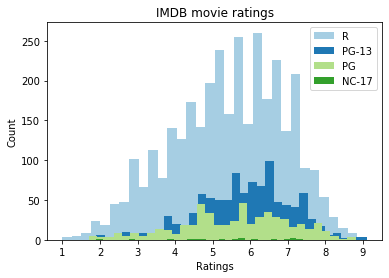

In [11]:
palette = plt.get_cmap('Paired')

for i in range(0,len(mpaas)):
  plt.hist(dataset[dataset.mpaa ==mpaas[i]].rating, stacked=True, color=palette(i),bins=32, label=mpaas[i])

plt.legend(prop={'size': 10})

plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('IMDB movie ratings')
plt.show()

One major flaw of *stacked bar charts* is that they become harder to read the more segments each bar has. Also comparing each segment to each other is difficult, as they're not aligned on a common baseline.

## Stacked Area charts
One of the positive things about using histograms with `matplotlib`, is that you do not need to care about the values to be shown in the `y` axis: the number of points in the given interval is counted and displayed. If you want to plot a multi line chart, or to use `bar` or `stackplot` instead of `hist`, you need to calculate them first. 

The goal, now, is to have a list of `x` values, that are all the unique `rating` values we have in our database. Then we want to group these ratings by their `mpaa` value, and count their occurances for each group. Let's use `pivot_table` to extract from our original `dataset`, that is a `pandas` dataframe, using `rating` as the index and `mpaa` as the column. We need to assign to each cell a number at the interception of a given `(rating,mpaa)` pair, representing the total number of occurrences of that pair. For such a purposes, we use `title` as a field that help us to list all the occurrences of that given `(rating,mpaa)` pair, using `len` as the aggregate function to enumerate these occurrences. Finally, we use `fill_value=0` to substitute all the `NaN` with a `0`.


In [12]:
pivot_t = pd.pivot_table(dataset,index=["rating"],columns=["mpaa"],values=["title"],aggfunc=len, fill_value=0)

In [13]:
pivot_t

title            
mpaa   NC-17 PG PG-13  R
rating                  
1.0        0  0     0  2
1.2        0  0     0  1
1.3        0  0     0  2
1.4        0  0     0  1
1.5        0  0     0  2
...      ... ..   ... ..
8.7        0  1     1  3
8.8        0  2     2  3
8.9        0  0     1  0
9.0        0  0     1  1
9.1        0  0     1  1

[81 rows x 4 columns]

To recap, we have a `rating` list (whose size is _N_) that we can use as our `x` values, our `mpaa` groups (whose size is _M_), and also a matrix (or an array of arrays) of _NxM_ values that contains, for each `mpaa` group, the number of occurrences for a given `rating`. Let's show them all:

In [14]:
# rating list as x values of our plots
pivot_t.index

Float64Index([1.0, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3,
              2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6,
              3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
              5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2,
              6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5,
              7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8,
              8.9, 9.0, 9.1],
             dtype='float64', name='rating')

In [15]:
# mpaa groups to be used also in the plot's legend
pivot_t.columns

MultiIndex([('title', 'NC-17'),
            ('title',    'PG'),
            ('title', 'PG-13'),
            ('title',     'R')],
           names=[None, 'mpaa'])

In [16]:
# 'clean' labeles, removing level with 'title' from the MultiIndex object
pivot_t.columns = pivot_t.columns.droplevel(level=0)

We can now create our *multi line chart*, using some tricks that we learnt in our `matplotlib03` notebook. 

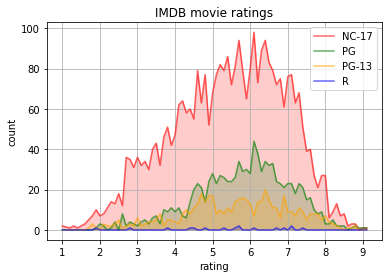

In [17]:
palette = ["blue","orange","green","red"]
plots = []

for i in range(3,-1,-1):
    plt.fill_between(pivot_t.index, pivot_t.values[:, i], color=palette[i], alpha=0.2)
    plots+=plt.plot(pivot_t.index, pivot_t.values[:, i], color=palette[i], alpha=0.6)

plt.xlabel('rating')
plt.ylabel('count')
plt.title('IMDB movie ratings')
plt.legend(plots, pivot_t.columns)
plt.grid(True)
plt.show()

_Multi line charts_ can help us to compare different groups of data, and we do not have to worry about bins size and numbers as with histograms: all the values we can place in the `x` axis will make a point in plot. Nevertheless, observe that areas overlap. They give an idea of the different sizes, however it is difficult to compare properly vertical lengths. **Stacked area charts** solve this problem.

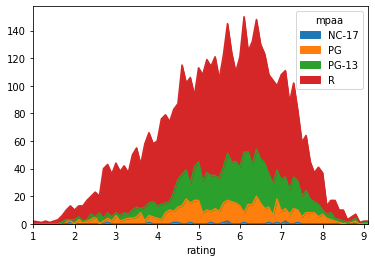

In [18]:
# plotting stacked area charts directly with pandas
ax = pivot_t.plot.area(stacked=True)

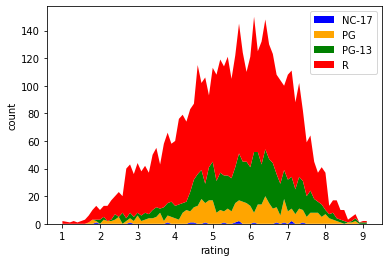

In [19]:
# alternatively, you can plot stacked area charts with matplotlib

plt.stackplot(pivot_t.index, 
              pivot_t.values[:, 0], pivot_t.values[:, 1], 
              pivot_t.values[:, 2], pivot_t.values[:, 3],colors=palette, labels=pivot_t.columns)

plt.legend(loc='upper right')
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

# Pie Charts
If you want to show the proportions (percentages) between different `mpaa` categories in our dataset, without dealing with user ratings, the very popular **Pie Charts** can be used for a very simple presentation. 

In a *pie chart*, categories' percentages are used to divide a circle into proportional sectors. Arcs length represent categories proportions, and the full circle is the total sum of all the data (i.e., 100%).

We have to do some math to get our percentages. Let's start counting out all the rows in our dataset.

In [20]:
totalRows = len(dataset)

For each `mpaa` category we just divide the number of rows affected by the total number of rows in our dataset. Then, we transform the obtained ratio to a percentage (we multiply the result by 100)

In [21]:
perc = []
for i in range(0,len(mpaas)):
  print(mpaas[i])
  num = len(dataset[dataset.mpaa == mpaas[i]])
  print( "{0:.2f}%".format(100*(num/totalRows)))
  perc+=[100*(num/totalRows)]


R
68.58%
PG-13
20.37%
PG
10.72%
NC-17
0.32%


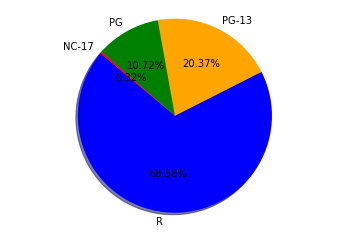

In [22]:
# Pie chart
plt.pie(perc, labels=mpaas, colors=palette, autopct='%1.2f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

We can improve the esthetics of our pie chart 'exploding' a sector to highlight a category over another, and moving percentages to our legend.

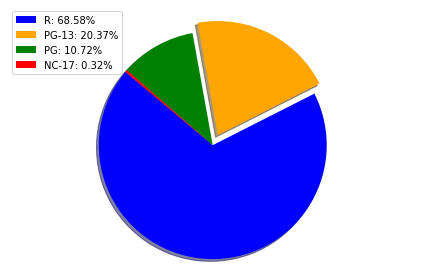

In [23]:
explode = (0.0, 0.1, 0.0, 0.0)  # explode 2nd slice

new_a = []
 
for i in perc:
  new_a += ["{0:.2f}%".format(i)]

# Plot
sectors, texts = plt.pie(perc, explode = explode, colors=palette, shadow=True, startangle=140)
legends =mpaas+": "+new_a
plt.legend(sectors, legends, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

_Pie charts_ have some downsides, apart from being over-exploited and so trivially _marketing_ oriented:

- With more than 5 different categories, their explicative power decreases dramatically.  In fact, as the number of categories increases, the size of each sector becomes smaller.

- Remember that we perceive naturally actual differences between 1 dimension length, but we fail somehow to compare propertly different areas. 

- They consume too much space (low *data-ink ratio*). If you compare this plot with our stacked bar/area charts, the result is clear, if you also add that with the alternatives we are also able to show another variable (`rating`), then pie charts are definitely losing more ground. However, this is partially solved adopting *donut chart* (see below).

## Donut chart

`matplotlib` does not provide one function to create _donut charts_. We need to make some aesthetics, as drawing a white circle in the middle of our pie chart. The result is definely more convincing, because it also saves space for other information that can be displayed in the center. Moreover it encourage to compare arcs lenghts instead of sectors' areas, partially solving also the second issue listed above.

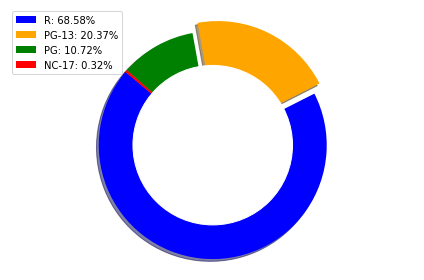

In [24]:
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Plot
sectors, texts = plt.pie(perc, explode = explode, colors=palette, shadow=True, startangle=140)

p=plt.gcf()
p.gca().add_artist(my_circle)

plt.legend(sectors, legends, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()